<a href="https://colab.research.google.com/github/ramikadri/ramikadri/blob/main/time_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df= pd.read_csv("fcc-forum-pageviews.csv")
df['date']=pd.to_datetime(df['date'])

df=df.set_index('date')

In [7]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [8]:
df = df[(df['value'] > (df['value'].quantile(0.025))) &
 (df['value'] < (df['value'].quantile(0.975)))]

In [9]:
df.index

DatetimeIndex(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-14', '2016-06-15',
               ...
               '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21',
               '2019-11-23', '2019-11-24', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1238, freq=None)

In [10]:
plt.matplotlib.dates.date2num(df.index)


array([736103., 736110., 736111., ..., 737393., 737394., 737396.])

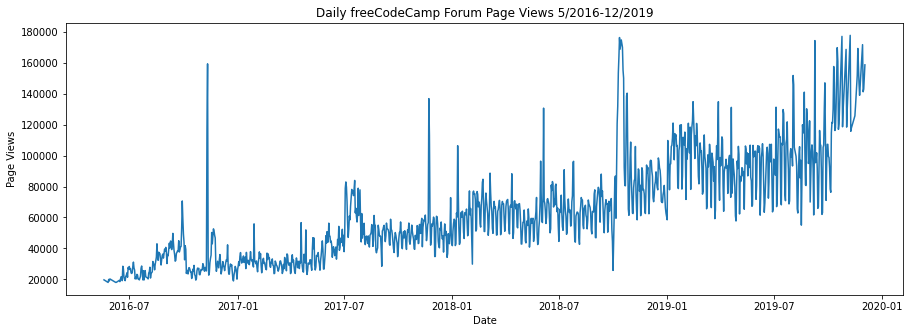

In [11]:

plt.figure(figsize=(15,5))
plt.plot(df.index, df['value'])  

plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()



In [12]:
df['Months']= df.index.month_name()
df['years']= df.index.year
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,value,Months,years
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


In [28]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(38.33239583333334, 0.5, 'Average Page Views')

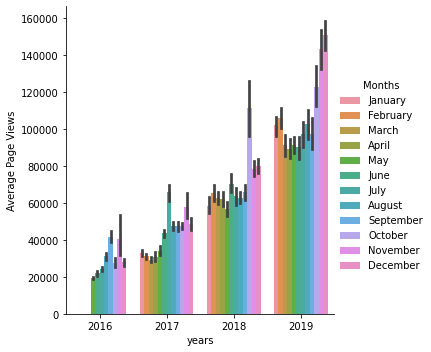

In [33]:
df["num"]= df.index.month
df= df.sort_values("num")
sns.catplot(x="years", y="value",hue="Months",kind='bar' ,data=df).axes[0,0].set_ylabel('Average Page Views')




Text(0.5, 0, 'Months')

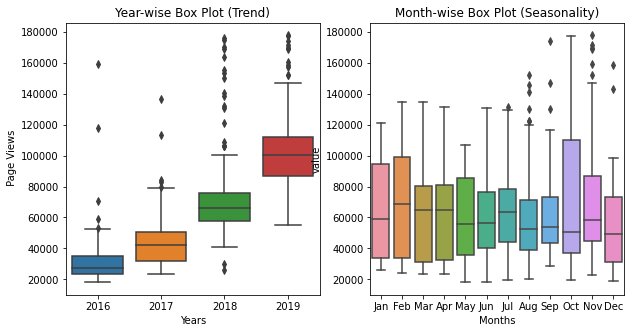

In [40]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
df_box["num"]= df_box['date'].dt.month
df_box= df_box.sort_values("num")
fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0]= sns.boxplot(x=df_box["year"],y=df_box["value"],ax=ax[0])
ax[1]= sns.boxplot(x=df_box["month"],y=df_box["value"],ax=ax[1])

ax[0].set_title("Year-wise Box Plot (Trend)")
  
ax[0].set_xlabel("Years")
ax[0].set_ylabel(" Page Views")
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Months")